In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from sklearn.pipeline import Pipeline

In [2]:
#df1= pd.read_excel("D:/Apsis/OBD Work/Kaggle_data/dailyRoutes.xlsx")
df1= pd.read_excel("dailyRoutes.xlsx")
#data=pd.read_csv('iBeacon_RSSI_Labeled.csv')

In [3]:
df1.shape

(47514, 33)

In [4]:
df1.head()

,TIMESTAMP,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,1502902504267,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.569,0.01,13.0,16.0,2.0,8.0,2017.0
1,1502902512283,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.565,0.01,13.0,16.0,2.0,8.0,2017.0
2,1502902520291,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.573,0.01,13.0,16.0,2.0,8.0,2017.0
3,1502902528300,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.565,0.01,13.0,16.0,2.0,8.0,2017.0
4,1502902536320,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.569,0.01,13.0,16.0,2.0,8.0,2017.0


In [5]:
df1.head()

,TIMESTAMP,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,1502902504267,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.569,0.01,13.0,16.0,2.0,8.0,2017.0
1,1502902512283,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.565,0.01,13.0,16.0,2.0,8.0,2017.0
2,1502902520291,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.573,0.01,13.0,16.0,2.0,8.0,2017.0
3,1502902528300,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.565,0.01,13.0,16.0,2.0,8.0,2017.0
4,1502902536320,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.569,0.01,13.0,16.0,2.0,8.0,2017.0


In [6]:
df1.isnull().sum()

TIMESTAMP                          0
MARK                              55
MODEL                             55
CAR_YEAR                          55
ENGINE_POWER                      55
AUTOMATIC                         55
VEHICLE_ID                         0
BAROMETRIC_PRESSURE(KPA)       37302
ENGINE_COOLANT_TEMP            13550
FUEL_LEVEL                     44520
ENGINE_LOAD                    16542
AMBIENT_AIR_TEMP               43895
ENGINE_RPM                     13655
INTAKE_MANIFOLD_PRESSURE       22425
MAF                            35686
LONG TERM FUEL TRIM BANK 2     34444
FUEL_TYPE                      27509
AIR_INTAKE_TEMP                13162
FUEL_PRESSURE                  47376
SPEED                            985
SHORT TERM FUEL TRIM BANK 2    34444
SHORT TERM FUEL TRIM BANK 1     9919
ENGINE_RUNTIME                 35612
THROTTLE_POS                   13655
DTC_NUMBER                       372
TROUBLE_CODES                  35589
TIMING_ADVANCE                 13352
E

In [7]:
df1.drop(df1.columns.difference(['ENGINE_POWER','BAROMETRIC_PRESSURE(KPA)','ENGINE_COOLANT_TEMP','FUEL_LEVEL','FUEL_PRESSURE','FUEL_TYPE', 'ENGINE_LOAD','ENGINE_RPM','INTAKE_MANIFOLD_PRESSURE','MAF','SPEED','THROTTLE_POS','LONG TERM FUEL TRIM BANK 2']), 1, inplace=True)

In [8]:
df1.head()

,ENGINE_POWER,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,LONG TERM FUEL TRIM BANK 2,FUEL_TYPE,FUEL_PRESSURE,SPEED,THROTTLE_POS
0,1.4,100.0,80.0,0.486,0.333,1009.0,49.0,4.49,NaN,Biodiesel_Ethanol,NaN,0.0,0.251
1,1.4,100.0,80.0,0.486,0.325,1003.0,52.0,4.51,NaN,Biodiesel_Ethanol,NaN,0.0,0.251
2,1.4,100.0,80.0,0.486,0.329,995.0,51.0,4.48,NaN,Biodiesel_Ethanol,NaN,0.0,0.251
3,1.4,100.0,80.0,0.486,0.325,1004.0,51.0,4.51,NaN,Biodiesel_Ethanol,NaN,0.0,0.251
4,1.4,100.0,80.0,0.486,0.329,1005.0,49.0,4.49,NaN,Biodiesel_Ethanol,NaN,0.0,0.251


In [9]:
df1.columns

Index(['ENGINE_POWER', 'BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP',
       'FUEL_LEVEL', 'ENGINE_LOAD', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE',
       'MAF', 'LONG TERM FUEL TRIM BANK 2', 'FUEL_TYPE', 'FUEL_PRESSURE',
       'SPEED', 'THROTTLE_POS'],
      dtype='object')

In [10]:
df1.isnull().sum()

ENGINE_POWER                     55
BAROMETRIC_PRESSURE(KPA)      37302
ENGINE_COOLANT_TEMP           13550
FUEL_LEVEL                    44520
ENGINE_LOAD                   16542
ENGINE_RPM                    13655
INTAKE_MANIFOLD_PRESSURE      22425
MAF                           35686
LONG TERM FUEL TRIM BANK 2    34444
FUEL_TYPE                     27509
FUEL_PRESSURE                 47376
SPEED                           985
THROTTLE_POS                  13655
dtype: int64

In [11]:
# function for the percentage of the null values
def assess_NA(data):
  
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [12]:
assess_NA(df1)

,Number of NA,Percent NA
FUEL_PRESSURE,47376,99.71
FUEL_LEVEL,44520,93.70
BAROMETRIC_PRESSURE(KPA),37302,78.51
MAF,35686,75.11
LONG TERM FUEL TRIM BANK 2,34444,72.49
FUEL_TYPE,27509,57.90
INTAKE_MANIFOLD_PRESSURE,22425,47.20
ENGINE_LOAD,16542,34.82
THROTTLE_POS,13655,28.74
ENGINE_RPM,13655,28.74


In [13]:
df1.FUEL_TYPE.value_counts()

Biodiesel_Ethanol     19867
Biodiesel_Gasoline      138
Name: FUEL_TYPE, dtype: int64

In [14]:
df1.dtypes

ENGINE_POWER                  float64
BAROMETRIC_PRESSURE(KPA)      float64
ENGINE_COOLANT_TEMP           float64
FUEL_LEVEL                    float64
ENGINE_LOAD                   float64
ENGINE_RPM                    float64
INTAKE_MANIFOLD_PRESSURE      float64
MAF                           float64
LONG TERM FUEL TRIM BANK 2    float64
FUEL_TYPE                      object
FUEL_PRESSURE                 float64
SPEED                         float64
THROTTLE_POS                  float64
dtype: object

In [15]:
df1.drop(['FUEL_LEVEL','INTAKE_MANIFOLD_PRESSURE','MAF','FUEL_TYPE','LONG TERM FUEL TRIM BANK 2','FUEL_PRESSURE','BAROMETRIC_PRESSURE(KPA)'], axis=1, inplace=True)

In [16]:
df1.shape

(47514, 6)

In [17]:
df1.head()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS
0,1.4,80.0,0.333,1009.0,0.0,0.251
1,1.4,80.0,0.325,1003.0,0.0,0.251
2,1.4,80.0,0.329,995.0,0.0,0.251
3,1.4,80.0,0.325,1004.0,0.0,0.251
4,1.4,80.0,0.329,1005.0,0.0,0.251


In [18]:
df1.shape

(47514, 6)

In [19]:
df1.isnull().sum()

ENGINE_POWER              55
ENGINE_COOLANT_TEMP    13550
ENGINE_LOAD            16542
ENGINE_RPM             13655
SPEED                    985
THROTTLE_POS           13655
dtype: int64

In [20]:
#threshold to drop which has 6 null values
df2=df1.dropna(thresh=6)

In [21]:
df2.shape

(29157, 6)

In [22]:
df2.isnull().sum()

ENGINE_POWER           0
ENGINE_COOLANT_TEMP    0
ENGINE_LOAD            0
ENGINE_RPM             0
SPEED                  0
THROTTLE_POS           0
dtype: int64

In [23]:
df2.head()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS
0,1.4,80.0,0.333,1009.0,0.0,0.251
1,1.4,80.0,0.325,1003.0,0.0,0.251
2,1.4,80.0,0.329,995.0,0.0,0.251
3,1.4,80.0,0.325,1004.0,0.0,0.251
4,1.4,80.0,0.329,1005.0,0.0,0.251


In [24]:
#df1.reset_index(drop=True, inplace=True)

In [25]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df2)

ModuleNotFoundError: No module named 'pandas_profiling'

In [26]:
prof.to_file(output_file='output.html')

NameError: name 'prof' is not defined

In [27]:
df2.dtypes

ENGINE_POWER           float64
ENGINE_COOLANT_TEMP    float64
ENGINE_LOAD            float64
ENGINE_RPM             float64
SPEED                  float64
THROTTLE_POS           float64
dtype: object

In [28]:
from sklearn.preprocessing import StandardScaler


In [29]:
df2.columns

Index(['ENGINE_POWER', 'ENGINE_COOLANT_TEMP', 'ENGINE_LOAD', 'ENGINE_RPM',
       'SPEED', 'THROTTLE_POS'],
      dtype='object')

In [30]:
#features = ['ENGINE_POWER', 'ENGINE_COOLANT_TEMP', 'ENGINE_LOAD', 'ENGINE_RPM',
     #  'SPEED', 'THROTTLE_POS']
#autoscaler = StandardScaler()
#df2[features] = autoscaler.fit_transform(df2[features])

In [31]:
df2.head()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS
0,1.4,80.0,0.333,1009.0,0.0,0.251
1,1.4,80.0,0.325,1003.0,0.0,0.251
2,1.4,80.0,0.329,995.0,0.0,0.251
3,1.4,80.0,0.325,1004.0,0.0,0.251
4,1.4,80.0,0.329,1005.0,0.0,0.251


In [32]:
df2.tail()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS
47497,1.6,99.0,0.059,1029.0,50.0,0.047
47499,1.6,94.0,0.412,2054.0,32.0,0.063
47504,1.6,94.0,0.196,1185.0,38.0,0.173
47505,1.6,96.0,0.251,1325.0,45.0,0.149
47512,1.6,99.0,0.055,769.0,0.0,0.082


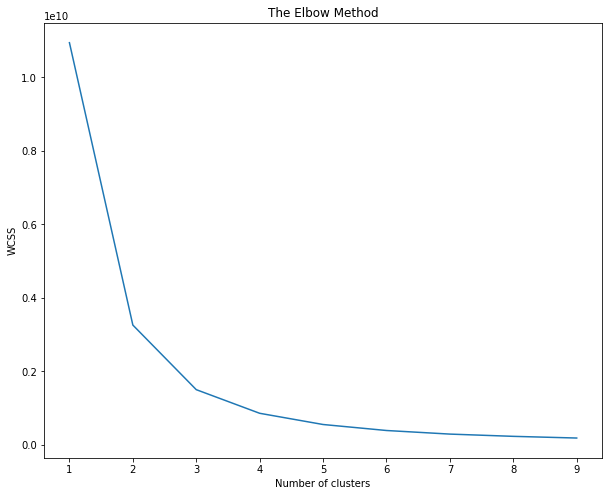

In [33]:
#optimum number of clusters using elbow curve
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 10):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(df2)
    
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 123)

kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [35]:
identified_clusters = kmeans.fit_predict(df2)
identified_clusters

array([1, 1, 1, ..., 4, 4, 1])

In [36]:
#to know value counts in array
import numpy as np


unique, counts = np.unique(identified_clusters, return_counts=True)

print (np.asarray((unique, counts)).T)

[[   0 5153]
 [   1 8447]
 [   2 7358]
 [   3 1982]
 [   4 6217]]


In [37]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [38]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import davies_bouldin_score

In [39]:
df2.head(3)

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS
0,1.4,80.0,0.333,1009.0,0.0,0.251
1,1.4,80.0,0.325,1003.0,0.0,0.251
2,1.4,80.0,0.329,995.0,0.0,0.251


In [40]:
labels = kmeans.labels_
davies_bouldin_score(df2, labels)

0.5137220810845159

In [41]:
df2['Cluster'] = identified_clusters
df2['Cluster']

C:\Users\Swati\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        1
1        1
2        1
3        1
4        1
        ..
47497    1
47499    0
47504    4
47505    4
47512    1
Name: Cluster, Length: 29157, dtype: int32

In [42]:
df2.head()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS,Cluster
0,1.4,80.0,0.333,1009.0,0.0,0.251,1
1,1.4,80.0,0.325,1003.0,0.0,0.251,1
2,1.4,80.0,0.329,995.0,0.0,0.251,1
3,1.4,80.0,0.325,1004.0,0.0,0.251,1
4,1.4,80.0,0.329,1005.0,0.0,0.251,1


In [43]:
df2.tail()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS,Cluster
47497,1.6,99.0,0.059,1029.0,50.0,0.047,1
47499,1.6,94.0,0.412,2054.0,32.0,0.063,0
47504,1.6,94.0,0.196,1185.0,38.0,0.173,4
47505,1.6,96.0,0.251,1325.0,45.0,0.149,4
47512,1.6,99.0,0.055,769.0,0.0,0.082,1


In [44]:
df2.Cluster.value_counts()

1    8447
2    7358
4    6217
0    5153
3    1982
Name: Cluster, dtype: int64

In [45]:
import pandas_profiling

pandas_profiling.ProfileReport(df2) 

ModuleNotFoundError: No module named 'pandas_profiling'

In [45]:
df2.insert(7, "Relative_RPM", 0.0)
rpm_max= df2['ENGINE_RPM'].max()

for i in df2.index:
    df2['Relative_RPM'][i]= df2['ENGINE_RPM'][i]/rpm_max

C:\Users\Swati\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Swati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
df2.insert(8, "Relative_Speed",0.0)
speed_max= df2['SPEED'].max()
for i in df2.index:
    df2['Relative_Speed'][i]= df2['SPEED'][i]/speed_max

C:\Users\Swati\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
df2.head(10)

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS,Cluster,Relative_RPM,Relative_Speed
0,1.4,80.0,0.333,1009.0,0.0,0.251,1,0.264413,0.0
1,1.4,80.0,0.325,1003.0,0.0,0.251,1,0.262841,0.0
2,1.4,80.0,0.329,995.0,0.0,0.251,1,0.260744,0.0
3,1.4,80.0,0.325,1004.0,0.0,0.251,1,0.263103,0.0
4,1.4,80.0,0.329,1005.0,0.0,0.251,1,0.263365,0.0
5,1.4,81.0,0.329,1019.0,0.0,0.251,1,0.267034,0.0
6,1.4,81.0,0.333,1002.0,0.0,0.251,1,0.262579,0.0
7,1.4,81.0,0.333,1001.0,0.0,0.251,1,0.262317,0.0
8,1.4,81.0,0.333,1004.0,0.0,0.251,1,0.263103,0.0
9,1.4,81.0,0.329,1010.0,0.0,0.251,1,0.264675,0.0


In [48]:
df2.insert(9, "Rev. Speed/Rev. RPM",0.0)

In [49]:
for i in df2.index:
    df2['Rev. Speed/Rev. RPM'][i]= df2['Relative_Speed'][i]/df2['Relative_RPM'][i]

C:\Users\Swati\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Swati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
df2.insert(10, "Rev_RPM/Throttle_Pos.",0.0)

In [51]:
for i in df2.index:
    df2['Rev_RPM/Throttle_Pos.'][i]= df2['Relative_RPM'][i]/df2['THROTTLE_POS'][i]

C:\Users\Swati\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
df2.head(10)

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS,Cluster,Relative_RPM,Relative_Speed,Rev. Speed/Rev. RPM,Rev_RPM/Throttle_Pos.
0,1.4,80.0,0.333,1009.0,0.0,0.251,1,0.264413,0.0,0.0,1.053438
1,1.4,80.0,0.325,1003.0,0.0,0.251,1,0.262841,0.0,0.0,1.047174
2,1.4,80.0,0.329,995.0,0.0,0.251,1,0.260744,0.0,0.0,1.038822
3,1.4,80.0,0.325,1004.0,0.0,0.251,1,0.263103,0.0,0.0,1.048218
4,1.4,80.0,0.329,1005.0,0.0,0.251,1,0.263365,0.0,0.0,1.049262
5,1.4,81.0,0.329,1019.0,0.0,0.251,1,0.267034,0.0,0.0,1.063879
6,1.4,81.0,0.333,1002.0,0.0,0.251,1,0.262579,0.0,0.0,1.046130
7,1.4,81.0,0.333,1001.0,0.0,0.251,1,0.262317,0.0,0.0,1.045086
8,1.4,81.0,0.333,1004.0,0.0,0.251,1,0.263103,0.0,0.0,1.048218
9,1.4,81.0,0.329,1010.0,0.0,0.251,1,0.264675,0.0,0.0,1.054482


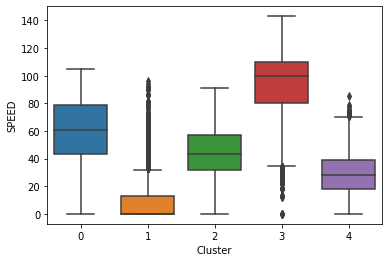

In [53]:
import seaborn as sns

sns.boxplot(x='Cluster', y='SPEED', data=df2)

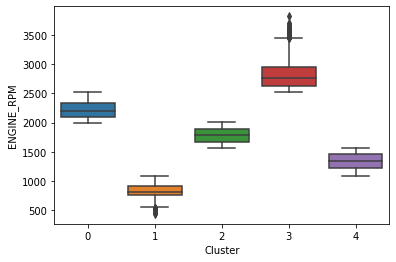

In [54]:
sns.boxplot(x='Cluster', y='ENGINE_RPM', data=df2)

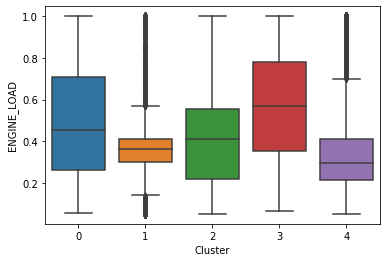

In [55]:
sns.boxplot(x='Cluster', y='ENGINE_LOAD', data=df2)

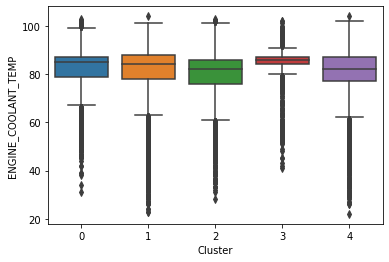

In [56]:
sns.boxplot(x='Cluster', y='ENGINE_COOLANT_TEMP', data=df2)

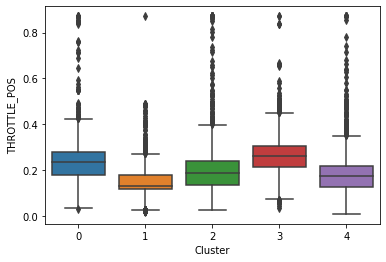

In [57]:
sns.boxplot(x='Cluster', y='THROTTLE_POS', data=df2)

[(0, 2)]

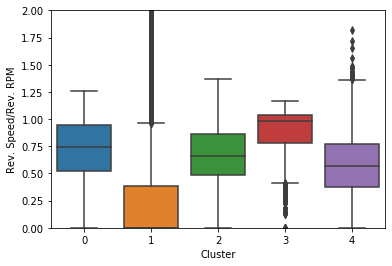

In [58]:
ax = sns.boxplot(x='Cluster', y='Rev. Speed/Rev. RPM', data=df2)
ax.set(ylim=(0,2))

[(0, 6)]

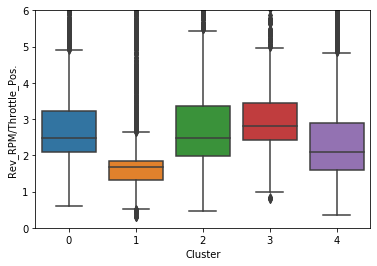

In [59]:
ax =sns.boxplot(x='Cluster', y='Rev_RPM/Throttle_Pos.', data=df2)
ax.set(ylim=(0,6))

In [60]:
df_filtered_0 = df2[df2['Cluster'] == 0]
df_filtered_1 = df2[df2['Cluster'] == 1]
df_filtered_2 = df2[df2['Cluster'] == 2]
df_filtered_3 = df2[df2['Cluster'] == 3]
df_filtered_4 = df2[df2['Cluster'] == 4]

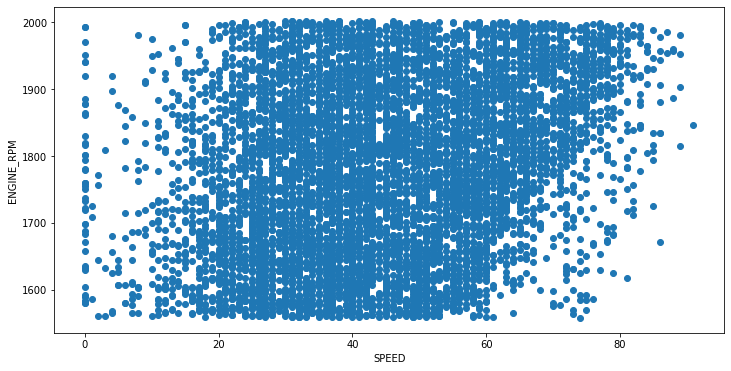

In [61]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_filtered_2['SPEED'], df_filtered_2['ENGINE_RPM'])
ax.set_xlabel('SPEED')
ax.set_ylabel('ENGINE_RPM')
plt.show()

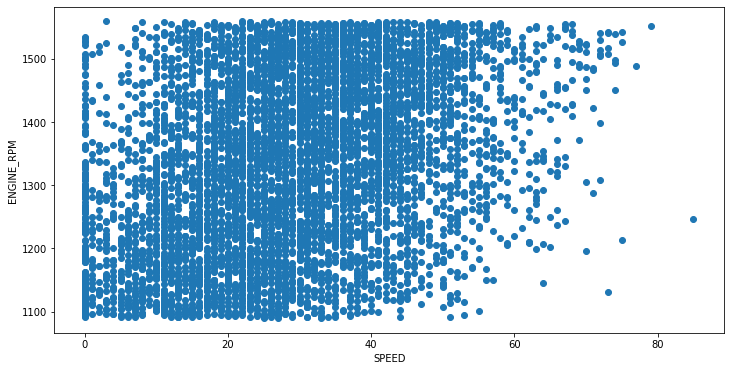

In [62]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_filtered_4['SPEED'], df_filtered_4['ENGINE_RPM'])
ax.set_xlabel('SPEED')
ax.set_ylabel('ENGINE_RPM')
plt.show()

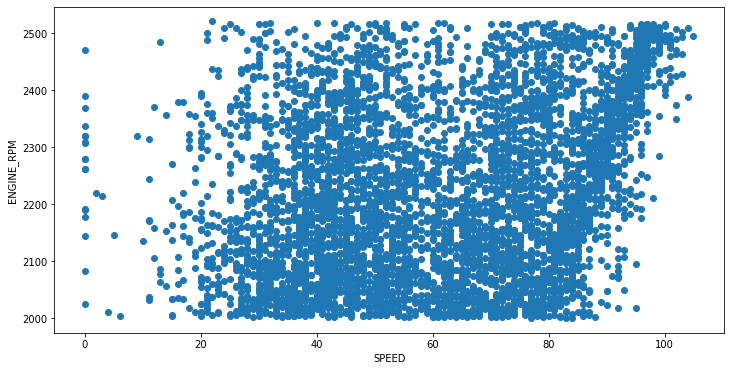

In [63]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_filtered_0['SPEED'], df_filtered_0['ENGINE_RPM'])
ax.set_xlabel('SPEED')
ax.set_ylabel('ENGINE_RPM')
plt.show()

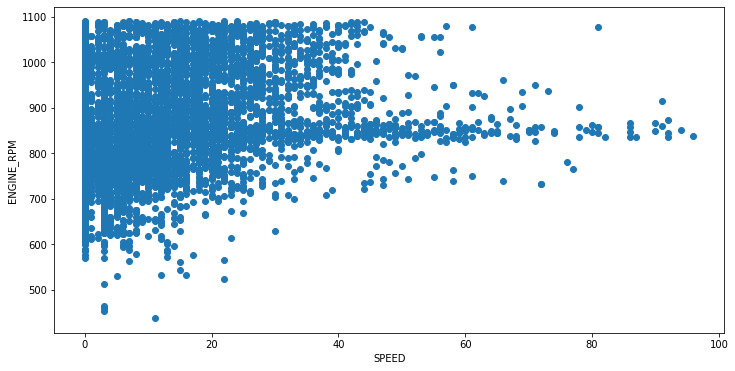

In [64]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_filtered_1['SPEED'], df_filtered_1['ENGINE_RPM'])
ax.set_xlabel('SPEED')
ax.set_ylabel('ENGINE_RPM')
plt.show()

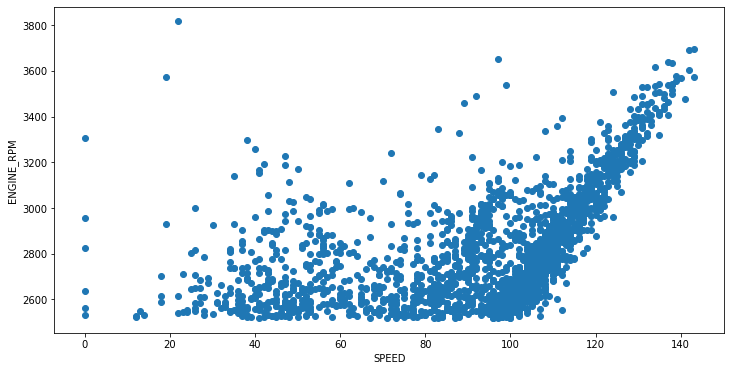

In [65]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_filtered_3['SPEED'], df_filtered_3['ENGINE_RPM'])
ax.set_xlabel('SPEED')
ax.set_ylabel('ENGINE_RPM')
plt.show()

In [66]:
#Cluster3: Aggressive, Rash and very Fuel inefficient/Poor Driving
#Cluster2: UnderConfident and Fuel Inefficient Driving
#Cluster 1: Optimal
#rest 2, under and over confident


In [67]:
df2.drop(['Relative_RPM','Relative_Speed','Rev. Speed/Rev. RPM','Rev_RPM/Throttle_Pos.'], axis=1, inplace=True)

C:\Users\Swati\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
X = df2.copy().drop(["Cluster"],axis=1)#drop the alpha ticker and date
Y = df2["Cluster"]

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=4)

In [70]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20409, 6)
(20409,)
(8748, 6)
(8748,)


In [71]:
from tpot import TPOTClassifier
tpot_mod=TPOTClassifier(generations=5,population_size=100,verbosity=2,random_state=2)
tpot_mod.fit(x_train,y_train)

C:\Users\Swati\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



Generation 1 - Current best internal CV score: 0.9998530132288094
Generation 2 - Current best internal CV score: 0.9998530132288094
Generation 3 - Current best internal CV score: 0.9998530132288094
Generation 4 - Current best internal CV score: 0.9998530132288094
Generation 5 - Current best internal CV score: 0.9998530132288094
Best pipeline: XGBClassifier(PCA(input_matrix, iterated_power=1, svd_solver=randomized), learning_rate=0.001, max_depth=8, min_child_weight=8, n_estimators=100, nthread=1, subsample=0.5)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x00000191A9E4DF08>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=2, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [73]:
tpot_pred_train = tpot_mod.predict(x_train)

In [74]:
tpot_pred_val = tpot_mod.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score

print("Train Accuracy :",accuracy_score(y_train,tpot_pred_train))
print("Test_Accuray   : ",accuracy_score(y_test,tpot_pred_val))

Train Accuracy : 0.9999020040178352
Test_Accuray   :  0.9997713763145862


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_train,tpot_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3576
           1       1.00      1.00      1.00      5890
           2       1.00      1.00      1.00      5211
           3       1.00      1.00      1.00      1365
           4       1.00      1.00      1.00      4367

    accuracy                           1.00     20409
   macro avg       1.00      1.00      1.00     20409
weighted avg       1.00      1.00      1.00     20409

